In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math as m
import seaborn as sns

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# get HCFAI

In [2]:
# Specify the path to your CSV file
# data_path = 'E:\\THESIS\\MS\\Data Collection - Preparation\\rg1-revised-cleaned-with-popcount-and-neighbors.csv'
data_path = '/content/drive/MyDrive/MS thesis/HFCAI/RG3/rg3_cleaned_sum.csv'
df = pd.read_csv(data_path)
df.head(2)

,ID,barangay_name,city_name,province_name,children_m,elderly_me,women_mean,youth_mean,women_repr,phall_mean,...,Road_Presence,POI_Presence,Nearest_RHU,Distance_to_Nearest_RHU_km,youth_children_sum,youth_elderly_sum,youth_phall_sum,youth_women_sum,youth_women_repr_sum,youth_youth_sum
0,2869579,Malabago,Santa Cruz,Zambales,0.664594,0.203666,2.411835,1.093365,1.189839,0.754546,...,0,0,2886181,34.519531,13.291880,4.073320,111.694760,48.23670,23.796780,21.86730
1,2869580,Malabago,Santa Cruz,Zambales,0.664594,0.203666,2.411835,1.093365,1.189839,0.532410,...,0,0,2886181,33.420460,2.658376,0.814664,22.338952,9.64734,4.759356,4.37346


In [3]:
df.columns

Index(['ID', 'barangay_name', 'city_name', 'province_name', 'children_m',
       'elderly_me', 'women_mean', 'youth_mean', 'women_repr', 'phall_mean',
       'flood_probability_value', 'rain intensity_value', 'drought_value',
       'buildability_landcov', 'RHU_Presence', 'Road_Presence', 'POI_Presence',
       'Nearest_RHU', 'Distance_to_Nearest_RHU_km', 'youth_children_sum',
       'youth_elderly_sum', 'youth_phall_sum', 'youth_women_sum',
       'youth_women_repr_sum', 'youth_youth_sum'],
      dtype='object')

In [4]:
# Rename columns
column_mapping = {
    'youth_children_sum': 'popden_chi',
    'youth_elderly_sum': 'popden_eld',
    'youth_women_sum': 'popden_wom',
    'youth_women_repr_sum': 'popden_w_1',
    'youth_youth_sum': 'popden_you',
    'youth_phall_sum': 'popden_all',
}


df = df.rename(columns=column_mapping)
df.loc[df['RHU_Presence'] == 1, 'Distance_to_Nearest_RHU_km'] = 0
df[df['RHU_Presence'] == 1]

dropcols = ['children_m', 'elderly_me', 'women_mean', 'youth_mean', 'women_repr', 'phall_mean']
df = df.drop(columns=dropcols)

# Get column names with NaNs using list comprehension
columns_with_nan = [col for col in df.columns if df[col].isna().any()]

# Print the column names
print("Columns with NaN values:", columns_with_nan)

Columns with NaN values: ['rain intensity_value', 'buildability_landcov']


In [5]:
# Get column names with NaNs using list comprehension
columns_with_nan = [col for col in df.columns if df[col].isna().any()]

# Print the column names
print("Columns with NaN values:", columns_with_nan)

Columns with NaN values: ['rain intensity_value', 'buildability_landcov']


In [6]:
# Impute NaNs with 0, considering data type safety
for col in columns_with_nan:
    # Check data type before imputing (avoid unintended conversions)
    if pd.api.types.is_numeric_dtype(df[col]):
        df[col] = df[col].fillna(0)  # Impute with 0 for numeric columns
    else:
        df[col] = df[col].fillna('NA')  # Impute with 'NA' for non-numeric columns
df

,ID,barangay_name,city_name,province_name,flood_probability_value,rain intensity_value,drought_value,buildability_landcov,RHU_Presence,Road_Presence,POI_Presence,Nearest_RHU,Distance_to_Nearest_RHU_km,popden_chi,popden_eld,popden_all,popden_wom,popden_w_1,popden_you
0,2869579,Malabago,Santa Cruz,Zambales,0.004992,0.293647,1.111608,0.0,0,0,0,2886181,34.519531,13.291880,4.073320,111.694760,48.236700,23.796780,21.867300
1,2869580,Malabago,Santa Cruz,Zambales,0.004992,0.293647,1.111608,0.0,0,0,0,2886181,33.420460,2.658376,0.814664,22.338952,9.647340,4.759356,4.373460
2,2869581,Malabago,Santa Cruz,Zambales,0.004992,0.293647,1.111608,0.0,0,0,0,2886181,32.053973,0.402059,0.123212,3.378597,1.459087,0.719816,0.661453
3,2870961,Malabago,Santa Cruz,Zambales,0.004992,0.293647,1.111608,0.0,0,0,0,2886181,33.596623,29.242136,8.961304,245.728472,106.120740,52.352916,48.108060
4,2870962,Malabago,Santa Cruz,Zambales,0.004992,0.293647,1.111608,0.0,0,0,0,2886181,32.294256,15.285662,4.684318,128.448974,55.472205,27.366297,25.147395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9520,3122453,Culat,Casiguran,Aurora,0.374058,2.985111,0.805856,0.0,0,0,0,3050618,87.852693,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9521,3123826,Masagana (Pob.),Dilasag,Aurora,0.002249,3.145965,0.671662,0.0,0,0,0,3050618,98.258424,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9522,3123827,Masagana (Pob.),Dilasag,Aurora,0.002249,3.145965,0.671662,0.0,0,0,0,3050618,97.346436,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9523,3123833,Culat,Casiguran,Aurora,0.374058,2.985111,0.805856,0.0,0,0,0,3050618,90.858735,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [7]:
columns_with_nan = [col for col in df.columns if df[col].isna().any()]
print("Columns with NaN values:", columns_with_nan)

Columns with NaN values: []


In [8]:
def HCI_calc(total_ai, total_gi, total_hi, total_ji, total_ki, total_mi,
              distance, road_bi, POI_ci, landCov_di, hazard1_ei, hazard2_ei, hazard3_ei, rhus_fi):

    total_vulnerable = total_gi + total_hi + total_ji + total_ki + total_mi
    total_pop = total_ai
    population_to_be_served = total_vulnerable + np.maximum(0, total_pop - total_vulnerable)

    # Calculate y for the entire Series without using if condition
    y = np.where(population_to_be_served == 0, 0, 20000 / ((population_to_be_served) * (distance + rhus_fi)))
    mc = np.tanh(y)

    w_bi = 0.3 # roads
    w_ci = 0.2 # POIs
    w_di = 0.5 # land cov

    b = (POI_ci * w_ci) + (road_bi * w_bi) + (landCov_di * w_di)

    # Normalize each factor
    rain_intensity_normalized = (hazard1_ei - hazard1_ei.min()) / (hazard1_ei.max() - hazard1_ei.min())
    flood_probability_normalized = (hazard2_ei - hazard2_ei.min()) / (hazard2_ei.max() - hazard2_ei.min())
    drought_mean_normalized = (hazard3_ei - hazard3_ei.min()) / (hazard3_ei.max() - hazard3_ei.min())
    w_rain = 0.4
    w_flood = 0.3
    w_drought = 0.3
    c = (w_rain * rain_intensity_normalized) + (w_flood * flood_probability_normalized) + (w_drought * drought_mean_normalized)

    f = b - c
    f = np.tanh(f)

    hci = mc * f
    hcfai = (1 + np.tanh(hci / 2)) / 2  # Sigmoid function

    return hcfai

In [9]:
# VARIABLES
# population vulnerable
popall = df["popden_all"]
children = df["popden_chi"]
elderly = df["popden_eld"]
women = df["popden_wom"]
women_reproductive = df["popden_w_1"]
youth = df["popden_you"]
distance = df["Distance_to_Nearest_RHU_km"]

flood = df["flood_probability_value"]
rain_intensity = df["rain intensity_value"]
drought = df["drought_value"]
roads = df["Road_Presence"]
rhus = df["RHU_Presence"]
pois = df["POI_Presence"]
buildability = df["buildability_landcov"]

In [10]:
df['HCFAI'] = HCI_calc(popall, children, elderly, women, women_reproductive, youth, distance,
    roads, pois, buildability, drought, rain_intensity, flood, rhus)

# Data exploration and visualization

In [13]:
print(max(list(df['HCFAI'].unique())))
# list(df['HCFAI'].unique())
print(min(list(df['HCFAI'].unique())))
# list(df['drought_value'])
# list(df['rain intensity_value'])
# list(df['flood_probability_value'])
for col in df.columns:
  print(col)

0.6572385061733428
0.36626005866370204
ID
barangay_name
city_name
province_name
flood_probability_value
rain intensity_value
drought_value
buildability_landcov
RHU_Presence
Road_Presence
POI_Presence
Nearest_RHU
Distance_to_Nearest_RHU_km
popden_chi
popden_eld
popden_all
popden_wom
popden_w_1
popden_you
HCFAI


In [14]:
# mid_to_high = []
# for i in list(df['HCFAI']):
#     if i >= 0.53:
#         mid_to_high.append(i)

# filtered_original_df = df[df['HCFAI'].isin(mid_to_high)]
# filtered_original_df = df[df['RHU_Presence'] == 1]

# x = df['HCFAI'].notna() # removing nan values
# x = df[x]
x=df[['popden_all', 'popden_you', "popden_w_1",
                      "popden_wom", "popden_eld", 'popden_chi',
                      'Distance_to_Nearest_RHU_km', "POI_Presence", "Road_Presence", "RHU_Presence",
                      'buildability_landcov', "drought_value", "rain intensity_value",
                         "flood_probability_value", "HCFAI"]]
x = x.sort_values(by='HCFAI', ascending=False)
# x[x['RHU_Presence']==0] # 4674 rows
x # 13420 rows
# len(locs_with_RHU['RHU_Presence'])

,popden_all,popden_you,popden_w_1,popden_wom,popden_eld,popden_chi,Distance_to_Nearest_RHU_km,POI_Presence,Road_Presence,RHU_Presence,buildability_landcov,drought_value,rain intensity_value,flood_probability_value,HCFAI
1656,134.046565,27.019693,30.064977,63.507357,5.702906,18.216161,24.764245,1,1,0,1.0,0.861023,0.394533,0.158213,0.657239
6241,296.713773,63.955143,75.604941,143.047107,17.355843,31.224690,34.316164,1,1,0,1.0,0.628111,0.804561,0.191205,0.653922
8005,62.446668,11.643340,14.259820,30.220352,4.055544,7.587792,28.780072,1,1,0,1.0,0.795277,1.026835,0.155382,0.652770
8749,4.683306,0.826855,0.959152,2.129979,0.324128,0.628410,11.502810,1,1,0,1.0,0.640426,1.672757,0.176629,0.651843
1562,480.684976,102.368086,145.854485,245.304011,31.520332,46.550858,1.836711,1,1,0,1.0,1.051625,0.514942,0.003618,0.651601
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4153,214.971665,42.259710,52.915850,103.039440,18.350320,24.863155,12.084622,0,0,0,0.0,1.510873,0.394550,0.605882,0.367720
4152,173.379479,32.900196,42.699278,83.683995,11.622472,21.319827,12.602177,0,0,0,0.0,1.511897,0.404036,0.616562,0.367004
4295,116.903214,22.177601,28.896251,56.463505,7.531423,14.475182,11.258612,0,0,0,0.0,1.511897,0.404036,0.616562,0.367004
4018,162.995724,28.470159,38.918932,80.025318,16.540309,16.907801,14.289160,0,0,0,0.0,1.505052,0.409957,0.639917,0.366260


In [15]:
locs_with_RHU = x[x['RHU_Presence']==1] # 27 rows (bcos there are nan values we disregarded)
locs_with_RHU

,popden_all,popden_you,popden_w_1,popden_wom,popden_eld,popden_chi,Distance_to_Nearest_RHU_km,POI_Presence,Road_Presence,RHU_Presence,buildability_landcov,drought_value,rain intensity_value,flood_probability_value,HCFAI
2080,5138.418130,885.779976,1332.127429,2625.815534,542.644034,484.106838,0.0,1,0,1,1.0,1.253058,0.308347,0.320355,0.568689
4269,3539.067454,639.393618,921.346516,1749.457921,273.683219,355.782144,0.0,1,0,1,1.0,1.259732,0.579280,0.254537,0.566655
6500,5201.983936,984.333953,1366.389077,2580.653696,366.198879,523.471677,0.0,1,0,1,1.0,0.954838,0.722307,0.669661,0.563616
6324,5873.840200,1140.440321,1544.706635,2909.675104,332.021378,636.937865,0.0,1,0,1,1.0,1.216252,0.743458,0.717155,0.535468
3102,1616.668743,323.798952,418.841709,792.334638,94.879032,188.901678,0.0,1,1,1,0.0,0.908626,0.545268,0.537164,0.533569
4363,7359.540568,1443.507817,1943.531694,3704.630045,708.805677,691.305798,0.0,1,1,1,0.0,0.790333,0.654474,0.664355,0.532888
4634,5735.292285,1136.989952,1402.230902,2815.087580,333.402589,680.396809,0.0,1,1,1,0.0,1.141138,0.595331,0.310049,0.525830
3206,18382.806900,3661.249704,5054.202358,9295.978837,1149.018516,1915.000503,0.0,1,1,1,0.0,0.961056,0.661073,0.608336,0.515340
3532,17241.035828,3338.815022,4848.138040,8698.591030,1260.731279,1653.384371,0.0,1,1,1,0.0,1.319439,0.522685,0.227339,0.512362
617,6125.847753,1042.356290,1556.155826,3063.889651,658.279161,560.309467,0.0,1,1,1,0.0,1.122303,0.509079,0.559259,0.512001


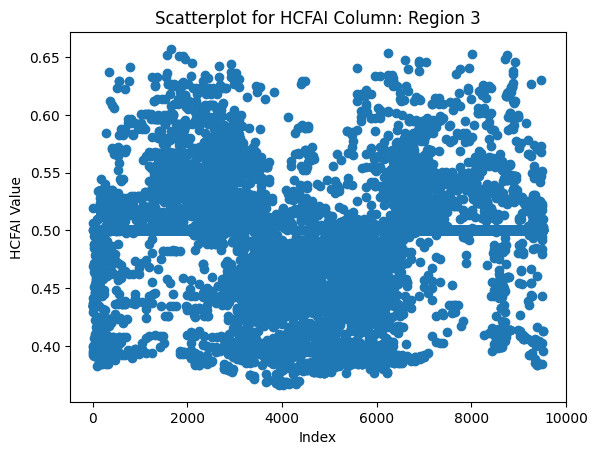

In [16]:
# Scatterplot for the 'HCFAI' column
plt.scatter(x.index, x['HCFAI'])
plt.title('Scatterplot for HCFAI Column: Region 3')
plt.xlabel('Index')
plt.ylabel('HCFAI Value')
plt.show()

# Feasibility Factors

In [ ]:
# a = a['buildability_landcov'].notna()
a = df[['Road_Presence', 'POI_Presence', 'RHU_Presence', 'buildability_landcov',
       'drought_value', 'rain intensity_value', 'flood_probability_value', 'HCFAI']]

a = a[a['RHU_Presence']==0]
a = a.sort_values(by='HCFAI', ascending=False)
a

,Road_Presence,POI_Presence,RHU_Presence,buildability_landcov,drought_value,rain intensity_value,flood_probability_value,HCFAI
5048,1,1,0,1.0,0.960775,0.430949,0.687815,0.654064
2596,1,1,0,1.0,1.141953,0.249932,0.361025,0.651058
1121,1,1,0,1.0,1.111672,0.289567,0.461596,0.650529
5267,1,0,0,1.0,0.848824,0.427353,0.224119,0.645940
5194,1,0,0,1.0,0.848824,0.427353,0.224119,0.645939
...,...,...,...,...,...,...,...,...
5590,0,0,0,NaN,1.046655,0.516940,0.426333,NaN
5591,0,0,0,NaN,1.088014,0.533677,0.440750,NaN
5596,1,1,0,NaN,0.864514,2.721783,0.598195,NaN
5680,0,1,0,NaN,0.797894,2.648136,1.438344,NaN


# Maximal Coverage Factors

In [ ]:
b = df[['popden_you', 'popden_wom', 'popden_eld', 'popden_chi',
       'popden_w_1', 'popden_all', 'Distance_to_Nearest_RHU_km', 'RHU_Presence', 'HCFAI']]
# b = b[b['buildability_landcov']==1]
b = b.sort_values(by='HCFAI', ascending=False)
# b[b['RHU_Presence']==1]
b

,popden_you,popden_wom,popden_eld,popden_chi,popden_w_1,popden_all,Distance_to_Nearest_RHU_km,RHU_Presence,HCFAI
5048,13.736079,41.149321,8.824771,8.173794,20.816993,363.896997,17.384668,0,0.654064
2596,5.296137,14.032293,2.747063,3.143041,6.904777,155.815402,31.481358,0,0.651058
1121,28.689414,77.553834,12.481618,19.290638,36.829012,125.914306,11.550333,0,0.650529
5267,0.000000,0.000000,0.000000,0.000000,0.000000,41.771628,25.204817,0,0.645940
5194,0.000000,0.000000,0.000000,0.000000,0.000000,124.261193,23.798066,0,0.645939
...,...,...,...,...,...,...,...,...,...
5590,0.000000,0.000000,0.000000,0.000000,0.000000,176.080449,19.736373,0,NaN
5591,0.000000,0.000000,0.000000,0.000000,0.000000,27.348926,19.029579,0,NaN
5596,46.984025,121.805750,14.989535,29.475215,64.996635,370.507160,15.552309,0,NaN
5680,0.000000,0.000000,0.000000,0.000000,0.000000,4.127558,18.802216,0,NaN


# EDA

In [17]:
# c=df['HCFAI'].notna()
# c = df[c]
# # c = df[['population_youth', 'population_women', 'population_elder60plus', 'population_children_under5',
# #        'population_reproductive_women', 'popden_all_total_population', 'Distance_to_Nearest_RHU_km',
# #         'Road_Presence', 'POI_Presence', 'RHU_Presence', 'buildability_landcov', 'drought_value', 'rain intensity_value',
# #         'flood_probability_value', 'HCFAI']]
# # c = c[c['RHU_Presence']==1]
# c = c.sort_values(by='HCFAI', ascending=False)
# c = c[['population_youth', 'population_women', 'population_elder60plus', 'population_children_under5',
#        'population_reproductive_women', 'popden_all_total_population', 'Distance_to_Nearest_RHU_km',
#         'Road_Presence', 'POI_Presence', 'RHU_Presence', 'buildability_landcov', 'drought_value', 'rain intensity_value',
#         'flood_probability_value', 'HCFAI']]
# c.sort_values(by='HCFAI', ascending=False)

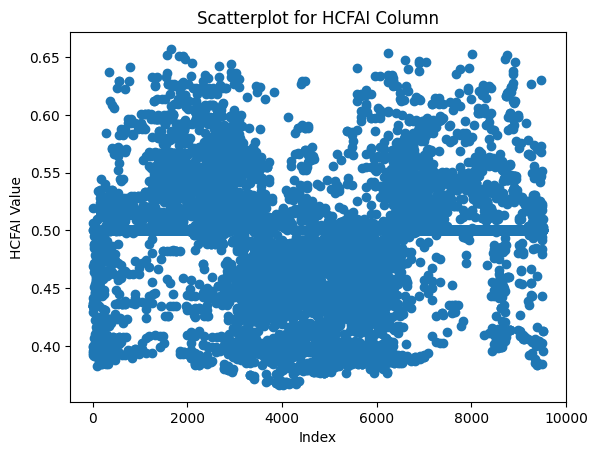

In [12]:
# Scatterplot for the 'HCFAI' column
plt.scatter(c.index, c['HCFAI'])
plt.title('Scatterplot for HCFAI Column')
plt.xlabel('Index')
plt.ylabel('HCFAI Value')
plt.show()

# Exporting

In [19]:
df.columns

Index(['ID', 'barangay_name', 'city_name', 'province_name',
       'flood_probability_value', 'rain intensity_value', 'drought_value',
       'buildability_landcov', 'RHU_Presence', 'Road_Presence', 'POI_Presence',
       'Nearest_RHU', 'Distance_to_Nearest_RHU_km', 'popden_chi', 'popden_eld',
       'popden_all', 'popden_wom', 'popden_w_1', 'popden_you', 'HCFAI'],
      dtype='object')

In [20]:
# Specify the file path for the CSV file
region =3
csv_file_path = f'/content/drive/MyDrive/MS thesis/HFCAI/RG3/rg{region}_HCFAI_sum.csv'
# Export the DataFrame to a CSV file
df.to_csv(csv_file_path, index=False)
print(f'DataFrame exported to CSV file: {csv_file_path}')

DataFrame exported to CSV file: /content/drive/MyDrive/MS thesis/HFCAI/RG3/rg3_HCFAI_sum.csv
